Passantenzählung Schönbornstraße seit 2019
https://opendata.wuerzburg.de/explore/dataset/hystreet_ab_1-1-2019/information/

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [10]:
data <- read_delim("hystreet_ab_1-1-2019.csv", delim = ";") %>% select(-min_temperature, -details)


── Column specification ────────────────────────────────────────────────────────
cols(
  timestamp = col_datetime(format = ""),
  weather_condition = col_character(),
  temperature = col_double(),
  min_temperature = col_logical(),
  pedestrians_count = col_double(),
  unverified = col_double(),
  details = col_character()
)




In [12]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [34]:
data <- data %>% mutate(monat=month(timestamp, label=TRUE), jahr=year(timestamp), tag=day(timestamp))

In [18]:
data %>% group_by(jahr, monat) %>% summarize(count=sum(pedestrians_count))

`summarise()` has grouped output by 'jahr'. You can override using the `.groups` argument.



jahr,monat,count
<dbl>,<ord>,<dbl>
2019,Jan,0
2019,Feb,0
2019,Mär,0
2019,Apr,880111
2019,Mai,904346
2019,Jun,896979
2019,Jul,953422
2019,Aug,916513
2019,Sep,981839


In [23]:
data %>%
    filter(monat=="Apr", jahr==2019) %>%
    mutate(tag=day(timestamp)) %>%
    filter(tag==2)

timestamp,weather_condition,temperature,pedestrians_count,unverified,monat,jahr,tag
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<ord>,<dbl>,<int>
2019-04-02 00:00:00,partly-cloudy-night,7.08,0,0,Apr,2019,2
2019-04-02 01:00:00,partly-cloudy-night,7.04,0,0,Apr,2019,2
2019-04-02 02:00:00,partly-cloudy-night,7.05,0,0,Apr,2019,2
2019-04-02 03:00:00,partly-cloudy-night,6.03,0,0,Apr,2019,2
2019-04-02 04:00:00,partly-cloudy-night,5.93,0,0,Apr,2019,2
2019-04-02 05:00:00,partly-cloudy-night,4.84,0,0,Apr,2019,2
2019-04-02 06:00:00,partly-cloudy-day,5.63,0,0,Apr,2019,2
2019-04-02 07:00:00,partly-cloudy-day,5.32,0,0,Apr,2019,2
2019-04-02 08:00:00,partly-cloudy-day,6.90,0,0,Apr,2019,2


In [57]:
options(repr.plot.width=12, repr.plot.height=10, repr.plot.res=150)

`summarise()` has grouped output by 'jahr'. You can override using the `.groups` argument.



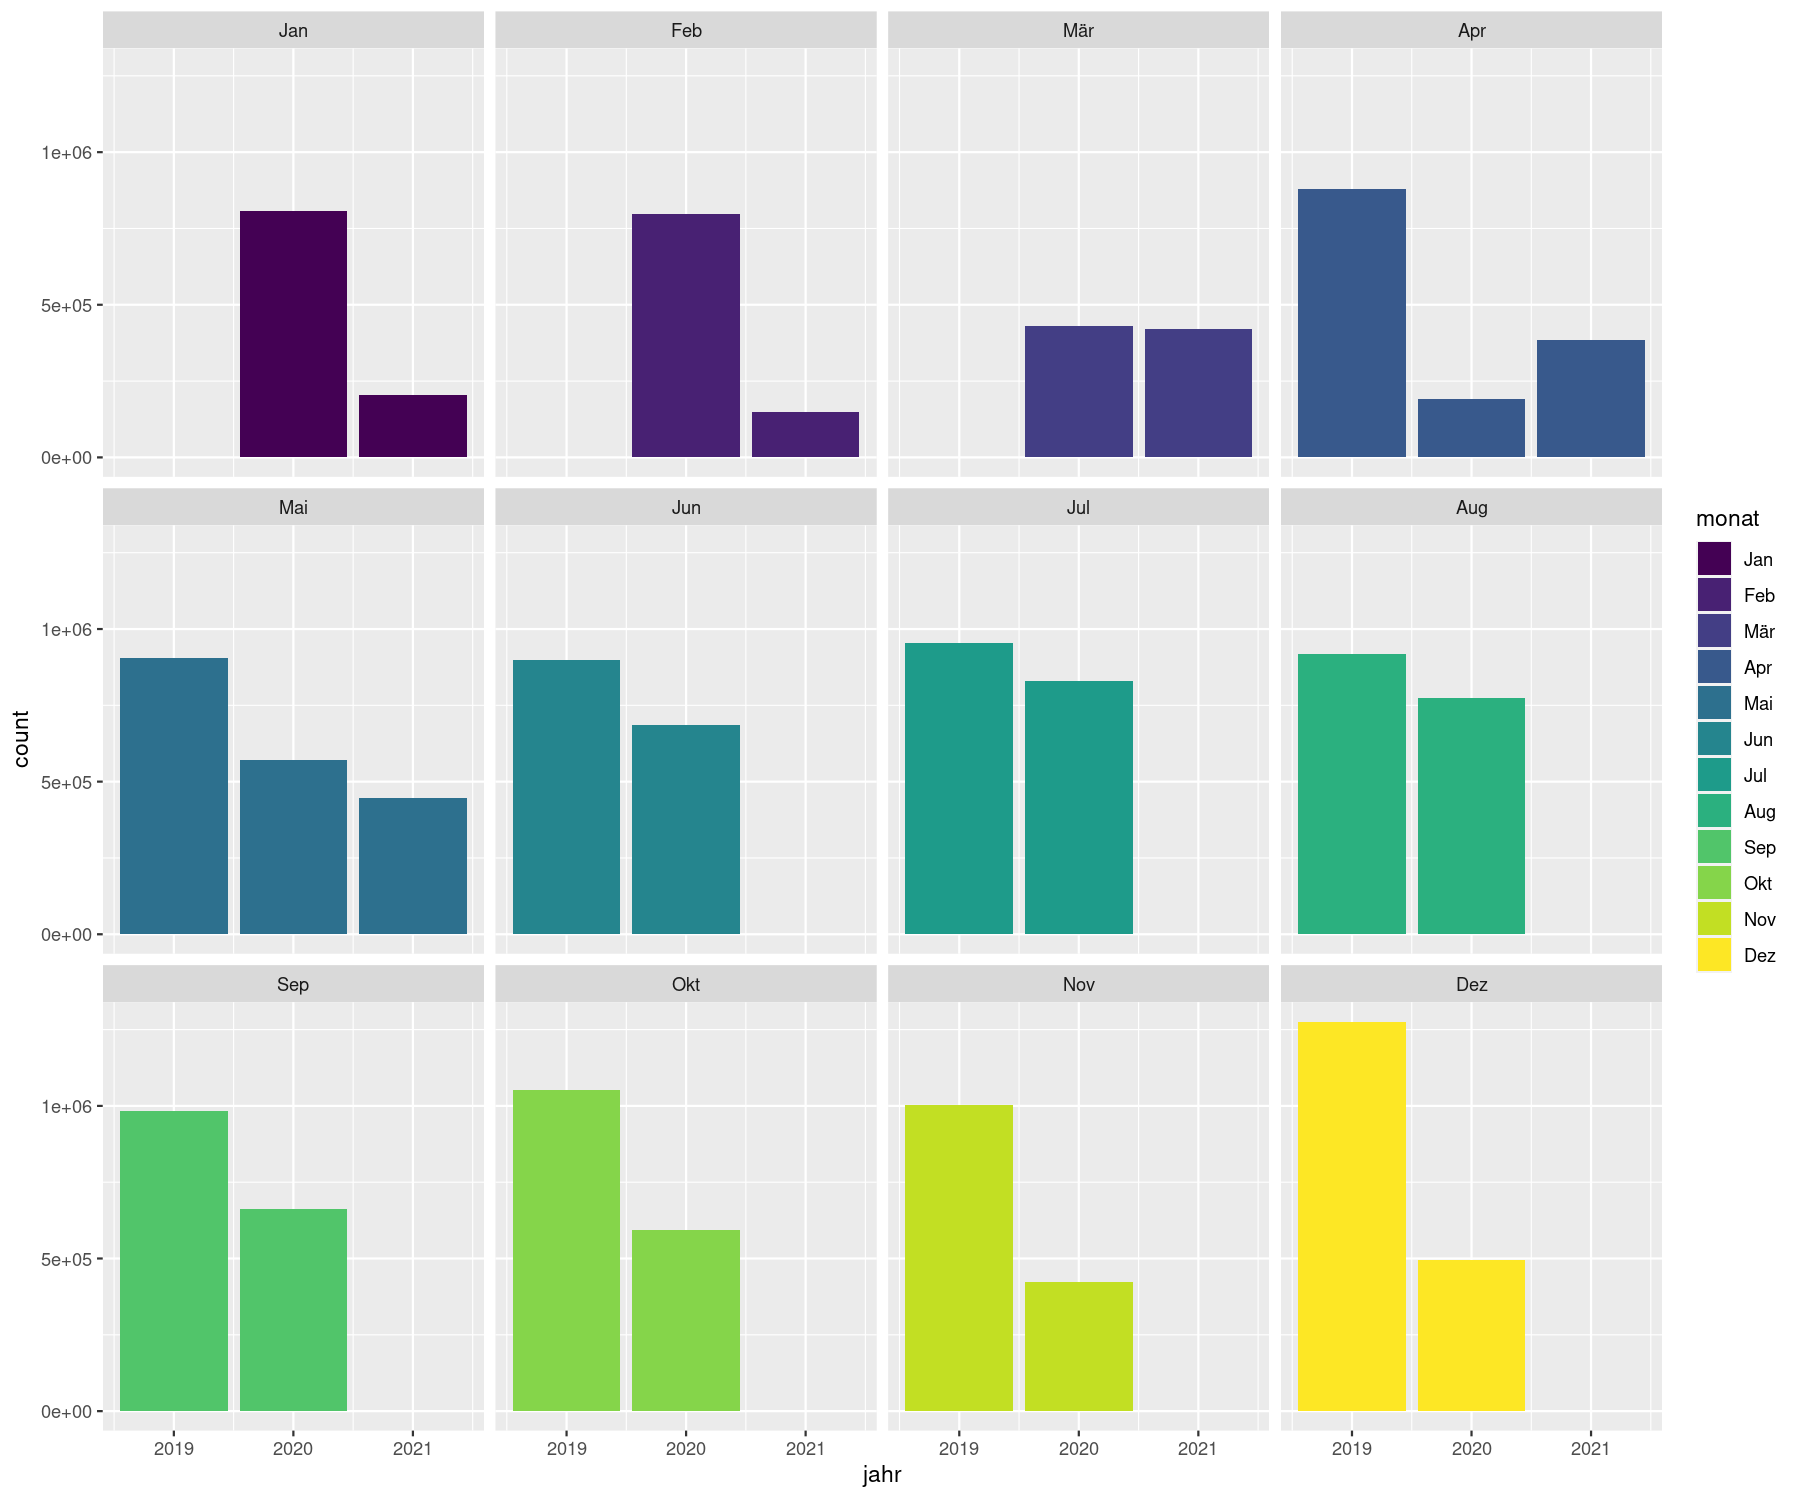

In [58]:
data %>% 
    group_by(jahr, monat) %>% 
    summarize(count=sum(pedestrians_count)) %>%
    ggplot(aes(x=jahr, y=count, fill=monat)) + geom_col() + facet_wrap(~monat)

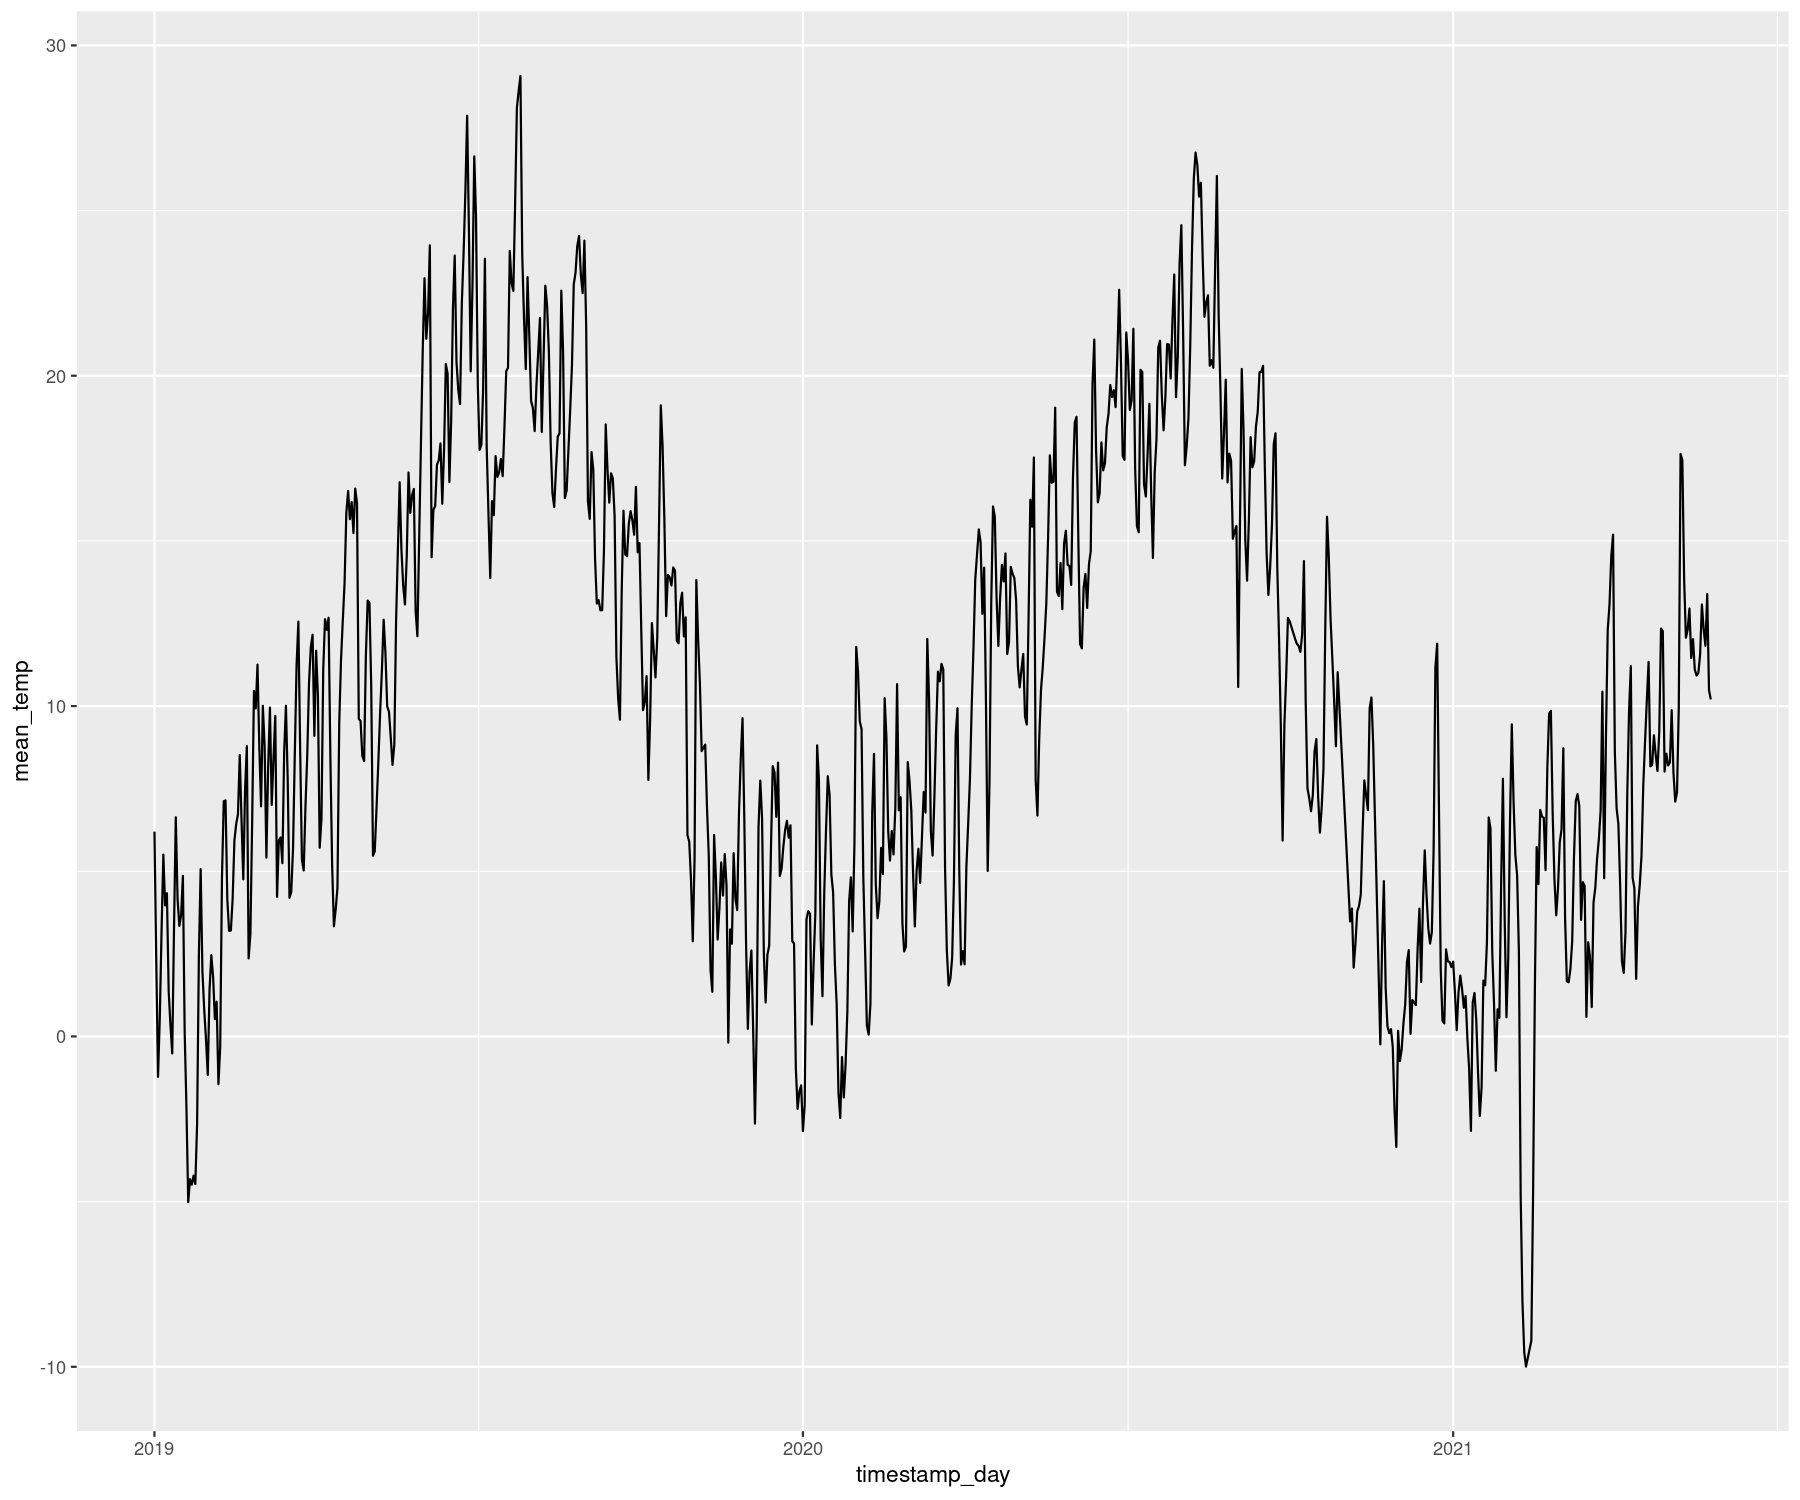

In [59]:
data %>% mutate(timestamp_day = floor_date(timestamp, unit = "day")) %>%
    group_by(timestamp_day) %>%
    summarize(mean_temp=mean(temperature)) %>%
    ggplot(aes(x=timestamp_day, y=mean_temp)) + geom_line()

In [60]:
data %>% mutate(timestamp_day = floor_date(timestamp, unit = "day")) %>%
    group_by(timestamp_day) %>%
    summarize(mean_temp=mean(temperature)) %>%
    filter(year(timestamp_day)>2020, mean_temp < -5)

timestamp_day,mean_temp
<dttm>,<dbl>
2021-02-09,-8.036250
2021-02-10,-9.555833
2021-02-11,-9.995652
2021-02-14,-9.210000


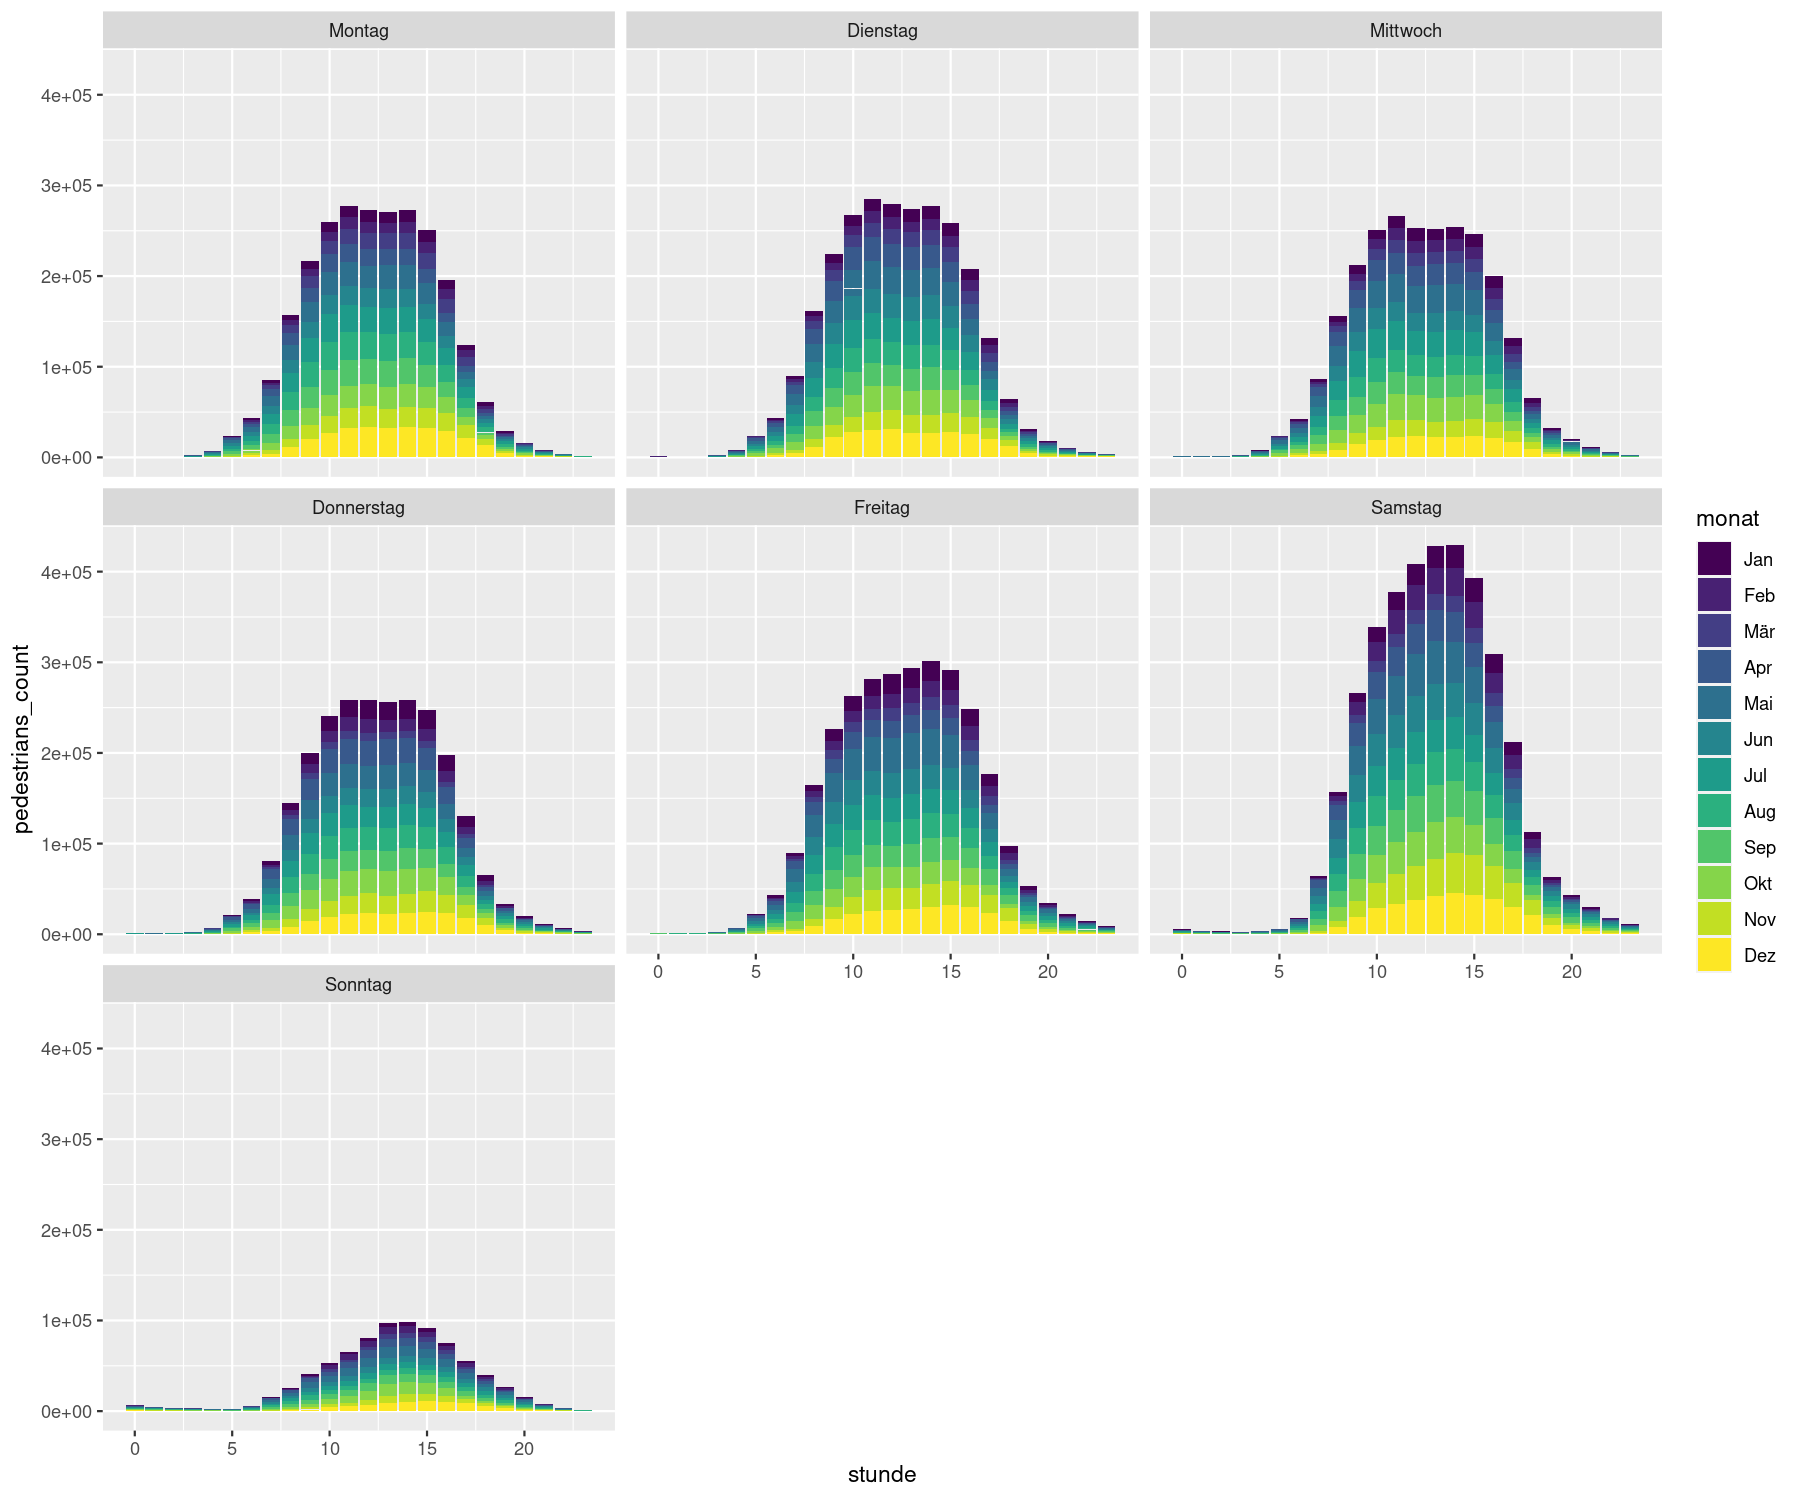

In [62]:
data %>% mutate(stunde=hour(timestamp), wochentag=weekdays(timestamp)) %>%
    mutate(
        wochentag = fct_relevel(wochentag, "Montag", "Dienstag", "Mittwoch"),
    ) %>%
    ggplot(aes(x=stunde, y=pedestrians_count, fill=monat)) + geom_col() + facet_wrap(~wochentag)

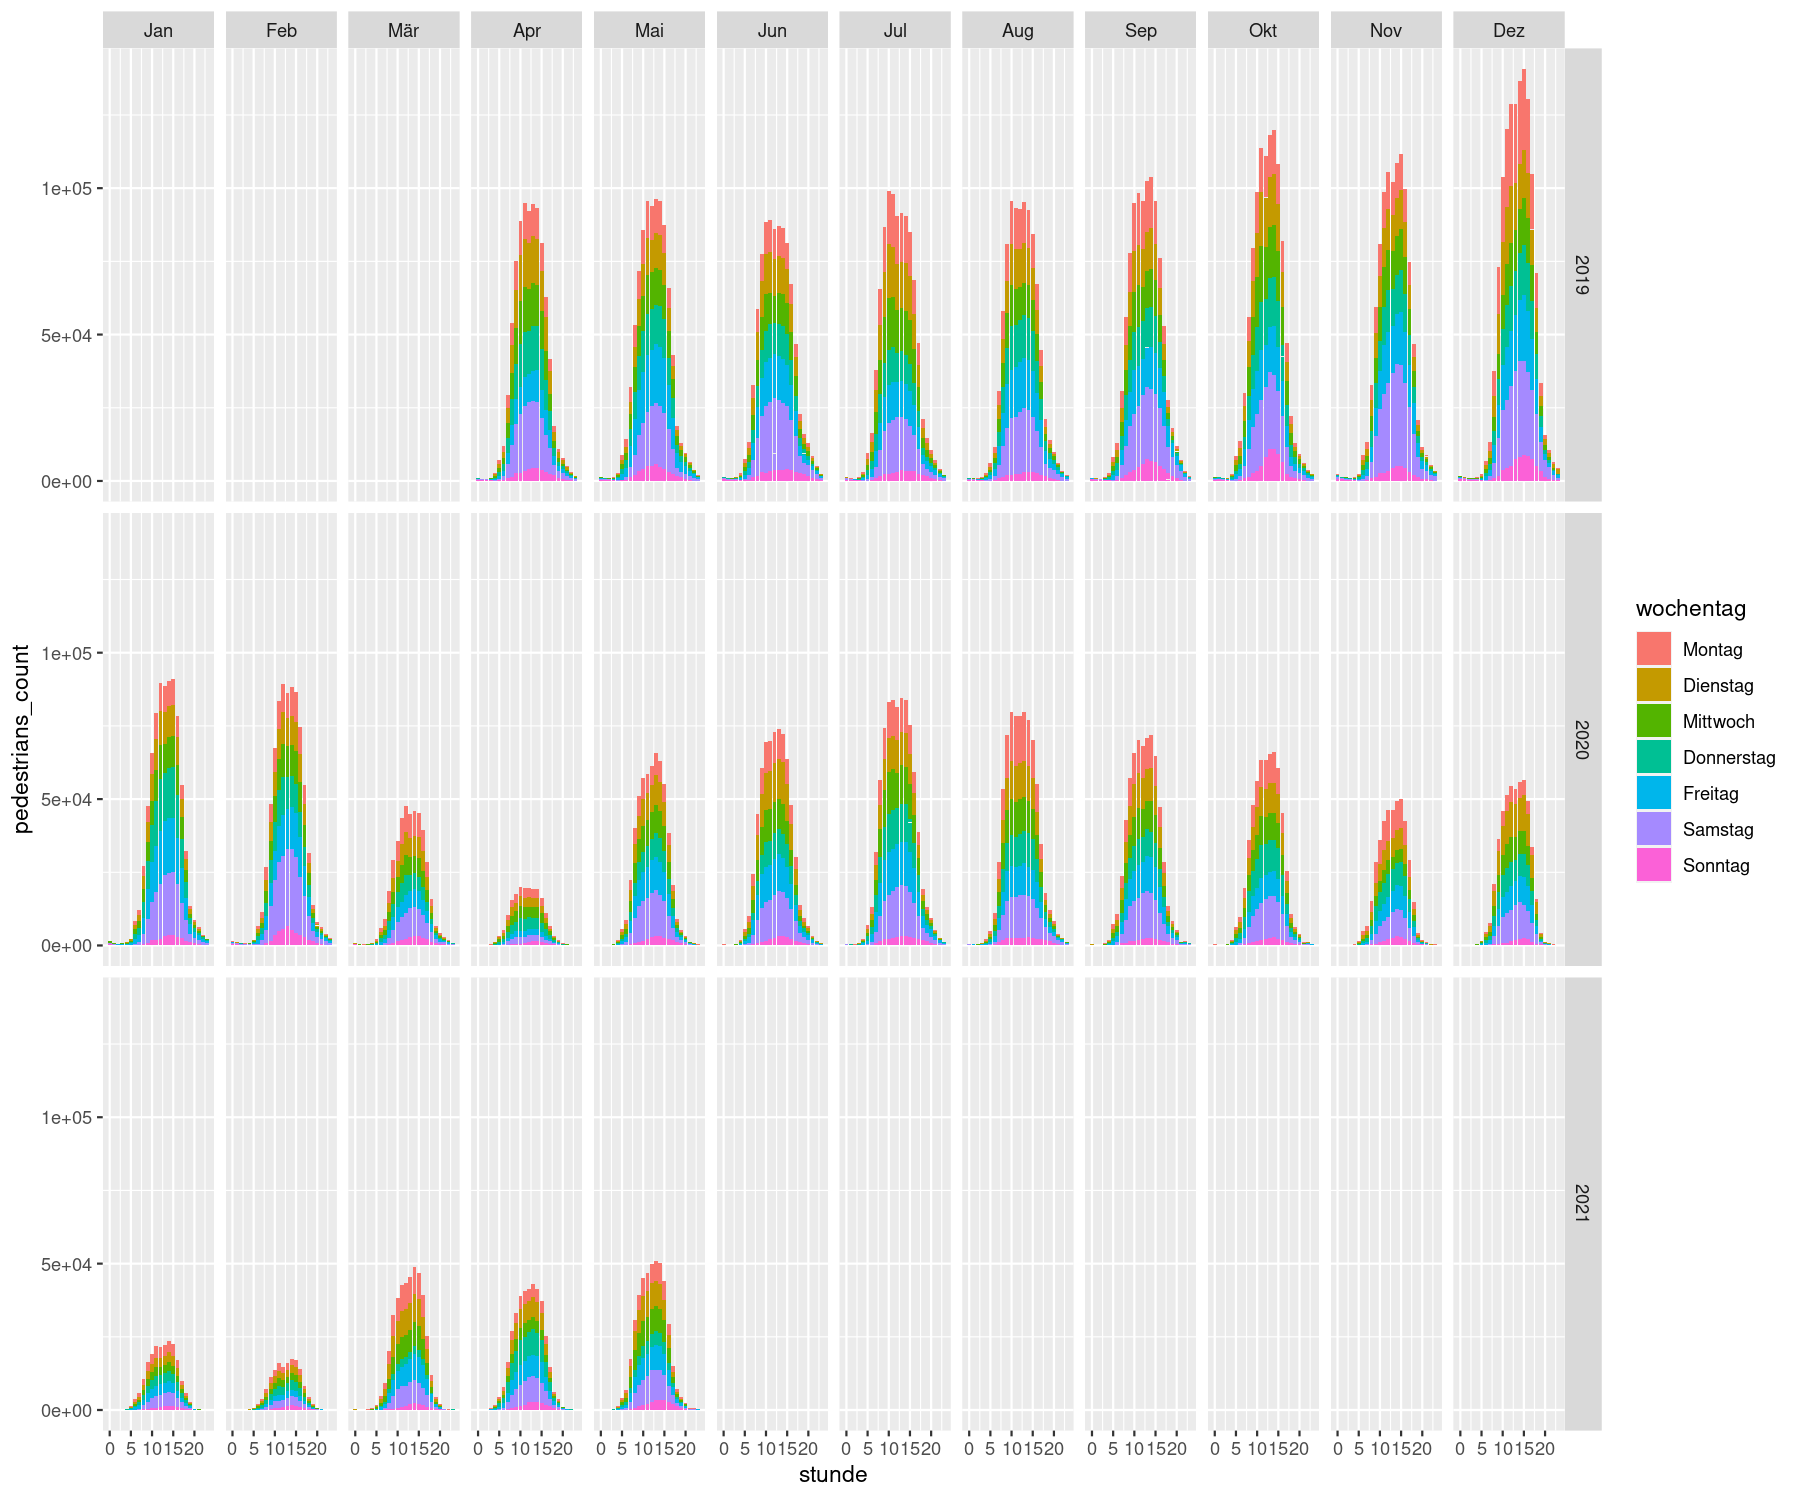

In [66]:
data %>% mutate(stunde=hour(timestamp), wochentag=weekdays(timestamp)) %>%
    mutate(
        wochentag = fct_relevel(wochentag, "Montag", "Dienstag", "Mittwoch"),
    ) %>%
    ggplot(aes(x=stunde, y=pedestrians_count, fill=wochentag)) + geom_col() + facet_grid(jahr~monat)